In [1]:
import numpy as np
import matplotlib.pyplot as plt

from music import *
from matched_beamforming import *
from flexibeam import *

In [2]:
real_data_folder = "../data/"
real_data_1 = real_data_folder + "data_1.npz"
real_data_2 = real_data_folder + "data_2.npz"

def load_data(data_str):
    npz_data = np.load(data_str)
    return npz_data["XYZ"], npz_data["S"], float(npz_data["T_slot"]), float(npz_data["lambda_"]), npz_data["src_model"]

def cartesian_to_arg(cartesian_coords):
    return np.angle(cartesian_coords[0] + cartesian_coords[1] * 1j)

**Dataset 1**

In [11]:
# Parameters for MUSIC

resolution = 0.15
time_t = 0

antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_1)
doas, widths, _, _, _ = music_algorithm(cov[time_t], antenna_positions, wavelength, 13, resolution=resolution)
print(doas)
print(widths)

# Arbitrary values (stolen from last year LOL)
# doas = np.array([ 92.3, 225.3])
# widths = np.array([14.02998362, 54.83234333])

b_gains, ts = flexibeam(antenna_positions, doas, widths, wavelength)
b_gains.shape, ts.shape

[ 93.3  200.7  224.1  243.9  261.45]
[ 4.22883356  5.34833018  9.12347411 31.2373853   3.91331811]


((10000,), (10000,))

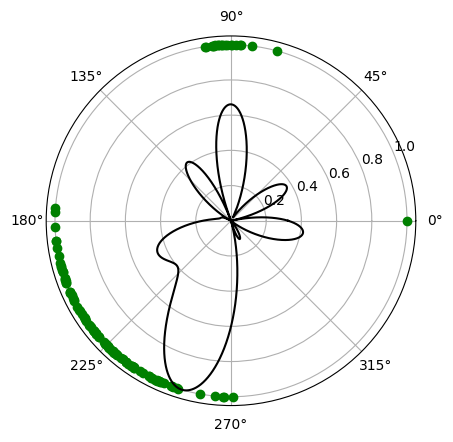

In [12]:
# plt.figure(figsize=(10,8))
# plt.polar()
# plt.plot(np.arange(N)/N*2*np.pi,gain)
# plt.show()

plt.polar(list(map(cartesian_to_arg,transmitter_positions)), np.ones(len(transmitter_positions)), "go", ts, b_gains/np.max(b_gains), '-k')

#plt.polar(ts, b_gains, '-k')
plt.show()

**Dataset 2**

In [4]:
# Parameters for MUSIC

resolution = 0.15
time_t = 0

antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_2)
doas, widths, _, _, _ = music_algorithm(cov[time_t], antenna_positions, wavelength, 13, resolution=resolution)

# Arbitrary values (stolen from last year LOL)
# doas = np.array([ 88.7, 231.6])
# widths = np.array([20.50426162, 83.06718354])

b_gains, ts = flexibeam(antenna_positions, doas, widths, wavelength)
b_gains.shape, ts.shape

(15, 2)
(2, 7)


((10000,), (10000,))

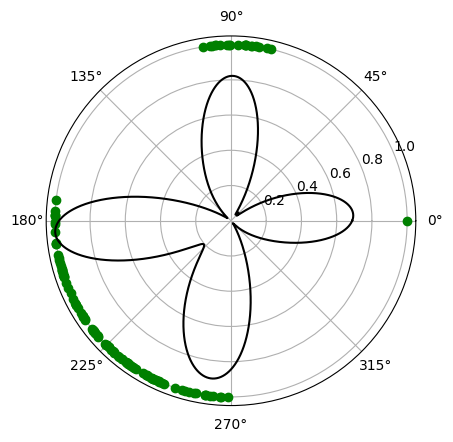

In [10]:
# plt.figure(figsize=(10,8))
# plt.polar()
# plt.plot(np.arange(N)/N*2*np.pi,gain)
# plt.show()

plt.polar(list(map(cartesian_to_arg,transmitter_positions)), np.ones(len(transmitter_positions)), "go", ts, b_gains/np.max(b_gains), '-k')
#plt.polar(ts, b_gains, '-k')
plt.show()

In [11]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_1)

channel_bandwidth_per_user=2e6
noise_level=0.1
c0=0.8
resolution=1e-4

r_user = np.zeros(len(transmitter_positions))

widths = np.array([1]*len(transmitter_positions))

transmitter_angles = []
for pos in transmitter_positions:
    a = (cartesian_to_arg(pos) % (2 * np.pi)) * 180 / np.pi
    transmitter_angles.append(a)

transmitter_angles = np.array(transmitter_angles)

i = 0
b_gain, _ = flexibeam(antenna_positions, transmitter_angles, widths, wavelength, resolution=resolution)
for pos in transmitter_positions:
    angle = cartesian_to_arg(pos)
    if(angle < 0):
        angle = angle + 2*np.pi
    angle_res = int(int(1./resolution) * angle/(2*np.pi))
    b = b_gain[angle_res]
    r_user[i] = channel_bandwidth_per_user * np.log2(1 + c0 * (b ** 2) / noise_level)
    i += 1

np.mean(r_user)

# 8771834.912503352 for dataset 1 flexibeam
# 10860139.940726815 for dataset 2 flexibeam

(19, 121)
(19, 2)
(2, 121)


8771834.912503352

In [9]:
np.var(r_user)

12042857757229.59

In [12]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_2)

channel_bandwidth_per_user=2e6
noise_level=0.1
c0=0.8
resolution=1e-4

r_user = np.zeros(len(transmitter_positions))

widths = np.array([1]*len(transmitter_positions))

transmitter_angles = []
for pos in transmitter_positions:
    a = (cartesian_to_arg(pos) % (2 * np.pi)) * 180 / np.pi
    transmitter_angles.append(a)

transmitter_angles = np.array(transmitter_angles)

i = 0
b_gain, _ = flexibeam(antenna_positions, transmitter_angles, widths, wavelength, resolution=resolution)
for pos in transmitter_positions:
    angle = cartesian_to_arg(pos)
    if(angle < 0):
        angle = angle + 2*np.pi
    angle_res = int(int(1./resolution) * angle/(2*np.pi))
    b = b_gain[angle_res]
    r_user[i] = channel_bandwidth_per_user * np.log2(1 + c0 * (b ** 2) / noise_level)
    i += 1

np.mean(r_user)

(15, 121)
(15, 2)
(2, 121)


10860139.940726815

In [11]:
np.var(r_user)

4621720196537.838